In [1]:
import re, os, sys, math, pickle, subprocess, resource, random
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [2]:
# from GenomicWindows import window
# import GenomicIntervals
from chromwindow import window
import genominterv

In [21]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
import seaborn as sns
sns.set_style("ticks")
sns.set_context("paper")

# lowess for plotting
from statsmodels.nonparametric.smoothers_lowess import lowess

In [4]:
root_dir = Path(os.environ['HOME'], 'GenomeDK', 'hri/faststorage/people/kmt')

In [5]:
! tail ../steps/interference_score/chimp/gerp/scores_species_coord/chr10.scores

chr10 131591370 187.08918827026162
chr10 131591374 187.089188850254
chr10 131591375 187.08918899525204
chr10 131591377 187.0891892852481
chr10 131591378 187.0891894302464
chr10 131591379 187.0891895752444
chr10 131591380 187.08918972024247
chr10 131591825 182.69072675521127
chr10 131591826 182.69072622047244
chr10 131591828 182.69072515099384


In [6]:
#scores = pd.read_table(root_dir / test.scores, sep='\s+', header=None, names=['chrom', 'start', 'score'])
scores_dir = Path('../steps/interference_score/chimp/gerp/scores_species_coord')
scores = pd.read_table(scores_dir / 'chr10.scores', sep='\s+', header=None, names=['chrom', 'start', 'score'])
scores['end'] = scores['start']

## TODO: Fix problem with huge positive and negative scores:

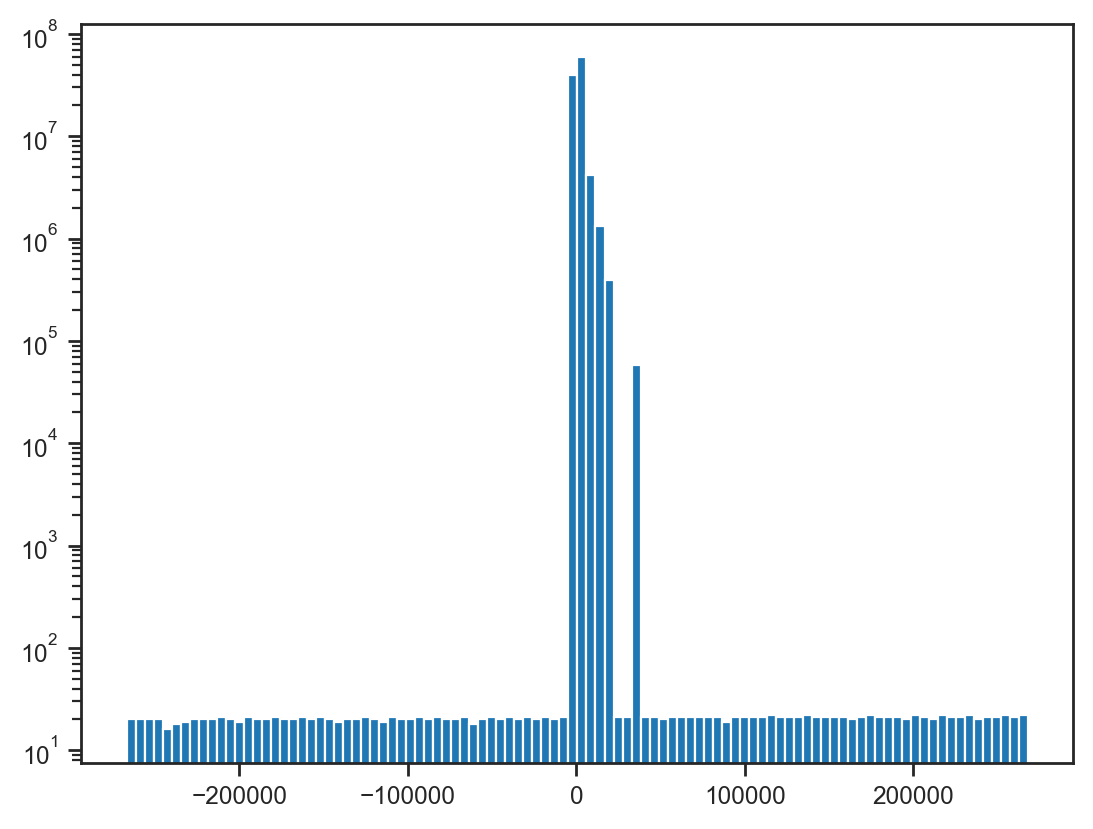

In [66]:
plt.hist(scores.score, bins=100) ;
plt.yscale('log')

## Window means along chromosome

In [39]:
window_size = 10000
# @window(size=window_size, fill={'mean_score': np.nan})
@window(size=window_size)
def mean_score(df):
    if df.index.size > 0:        
        mean = np.nanmean(df.score)
    else:
        mean = np.nan
    return mean

mean_score_df = scores.groupby('chrom').apply(mean_score)#.reset_index(level=['chrom'])

In [40]:
mean_score_df.tail()

start        end  mean_score
chrom                                        
chr10 13155  131550000  131560000         NaN
      13156  131560000  131570000  243.220399
      13157  131570000  131580000  177.307044
      13158  131580000  131590000  180.325558
      13159  131590000  131600000  183.833379

In [41]:
mean_score_df.to_hdf('mean_score.h5', 'df', format='table')

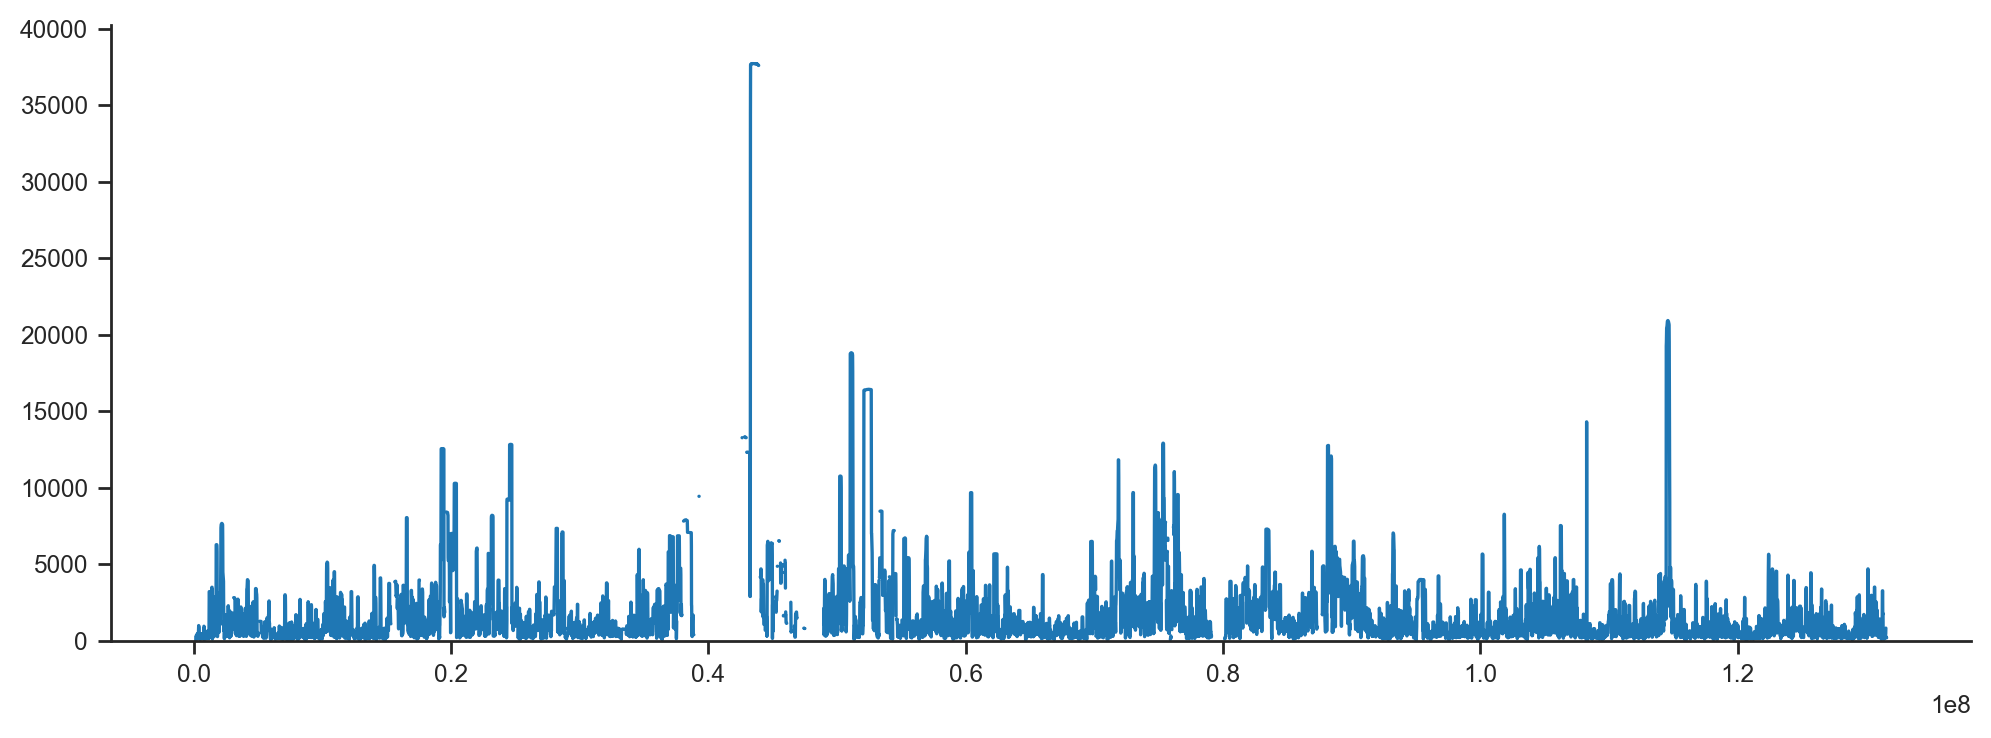

In [51]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(mean_score_df.start, mean_score_df.mean_score)
ax.set_ylim(bottom=0)
# ax.set_ylim(top=12000)
# ax.set_xlim(0, 40000000)
sns.despine()

In [52]:
np.sum(np.isnan(mean_score_df.mean_score))

1126

In [53]:
np.sum(np.isnan(scores.score))

0

In [54]:
np.sum(scores.score < 0)

16444